### Import Dependencies

In [120]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv

### Retrieve CSV data files

In [121]:
#CSV file paths
accident_path = "project_data/accident_df.csv"
accident_event_path = "project_data/accident_event_df.csv"
person_path = "project_data/person_df.csv"
subdca_path = "project_data/subdca_path_df.csv"

# reading the CSV files, increase memory capacity
accident_df = pd.read_csv(accident_path, low_memory = False)
accident_event_df = pd.read_csv(accident_event_path, low_memory = False)
person_df = pd.read_csv(person_path, low_memory = False)
subdca_df = pd.read_csv(subdca_path, low_memory = False)

output_path = "c:/project_output"

## Define function

In [122]:
# Save figure into file, then display
def save_show_plot(filepath):
    filepath = f"{filepath}.png"
    
    plt.savefig(filepath)
    print(f"*** Figure created in: {filepath} ************************")

    # Show plot
    plt.show()    
    plt.close()


### Extract interested accident data

In [123]:
df = accident_df.loc[:, ~accident_df.columns.str.contains('^Unnamed')]
df.reset_index(drop=True, inplace = True)
extract_acct_df = accident_df[['ACCIDENT_NO', 'ACCIDENTDATE', 'ACCIDENTTIME', 'ACCIDENT_TYPE', 'Accident Type Desc',
        'Light Condition Desc','SPEED_ZONE', 'NO_PERSONS', 'SEVERITY', 'SEVERITY_DESC']]
extract_acct_df.rename(columns={"Accident Type Desc":"ACCT_TYPE_DESC", 'Light Condition Desc': 'LIGHT_COND_DESC'}, inplace=True) 
row_counts = len(extract_acct_df["ACCIDENT_NO"].unique())
row_counts

c:\Users\youpe.DESKTOP-UVNLIE6\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


62266

## Accident Type analysis for each year

### Build accident type count lists base on year

In [124]:
# Convert ACCIDENTDATE to datetime format to get the year
extract_acct_df["ACCIDENTDATE"] = pd.to_datetime(extract_acct_df["ACCIDENTDATE"])
extract_acct_df["ACCIDENTYEAR"] = extract_acct_df["ACCIDENTDATE"].dt.year

# Get accident type data base on year
df = extract_acct_df.groupby(["ACCIDENTYEAR", "ACCIDENT_TYPE", "ACCT_TYPE_DESC"]).count()["ACCIDENT_NO"]
df = df.to_frame()
df.reset_index(inplace = True)
df.to_csv("project_data/Cause_YrAcctType.csv", index=False)

# Build accident type data lists
# 1 Collision with vehicle;  2 Struck pedestrian;  3 Struck animal; 4 Collision with a fixed object; 
# 5 Collision with some other object; 6 Vehicle overturned (no collision); 7 Fall from or in moving vehicle;
# 8 No collision and no object struck; 9 Other accident
coll_with_veh_counts = df.loc[df["ACCIDENT_TYPE"] == 1]
coll_with_veh_counts = coll_with_veh_counts["ACCIDENT_NO"]
struck_ped_counts = df.loc[df["ACCIDENT_TYPE"] == 2]
struck_ped_counts = struck_ped_counts["ACCIDENT_NO"]
struck_animal_counts = df.loc[df["ACCIDENT_TYPE"] == 3]
struck_animal_counts = struck_animal_counts["ACCIDENT_NO"]
coll_with_fixed_obj_counts = df.loc[df["ACCIDENT_TYPE"] == 4]
coll_with_fixed_obj_counts = coll_with_fixed_obj_counts["ACCIDENT_NO"]
coll_with_other_obj_counts = df.loc[df["ACCIDENT_TYPE"] == 5]
coll_with_other_obj_counts = coll_with_other_obj_counts["ACCIDENT_NO"]
veh_overturn_counts = df.loc[df["ACCIDENT_TYPE"] == 6]
veh_overturn_counts = veh_overturn_counts["ACCIDENT_NO"]
fall_moving_veh_counts = df.loc[df["ACCIDENT_TYPE"] == 7]
fall_moving_veh_counts = fall_moving_veh_counts["ACCIDENT_NO"]
no_coll_counts = df.loc[df["ACCIDENT_TYPE"] == 8]
no_coll_counts = no_coll_counts["ACCIDENT_NO"]
other_acct_counts = df.loc[df["ACCIDENT_TYPE"] == 9]
other_acct_counts = other_acct_counts["ACCIDENT_NO"]

C:\Users\YOUPE~1.DES\AppData\Local\Temp/ipykernel_16256/269476340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extract_acct_df["ACCIDENTDATE"] = pd.to_datetime(extract_acct_df["ACCIDENTDATE"])
C:\Users\YOUPE~1.DES\AppData\Local\Temp/ipykernel_16256/269476340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extract_acct_df["ACCIDENTYEAR"] = extract_acct_df["ACCIDENTDATE"].dt.year


### Setup bars, labels, etc to plot the bar chart

*** Figure created in: c:/project_output/Cause_YearlyAccidentType.png ************************


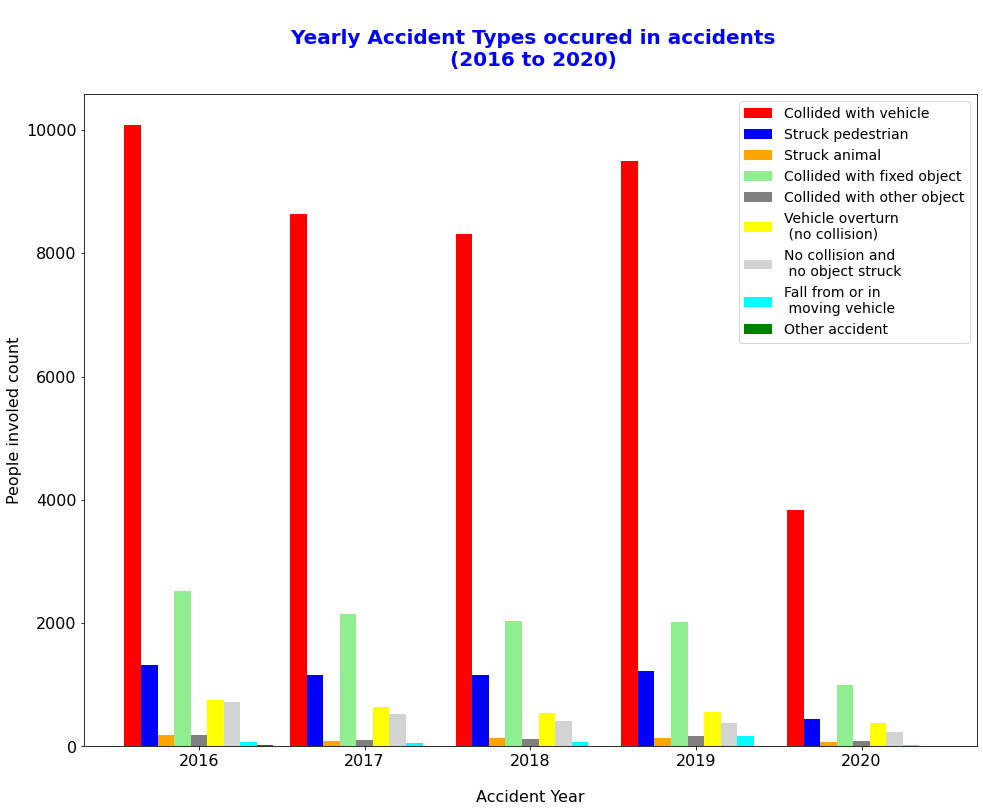

In [125]:
bar_width = 0.1 
xlabels = ['2016', '2017', '2018', '2019', '2020']

# Define bar group location on x_axis
bar1 = np.arange(len(xlabels))
bar2 = [i+bar_width for i in bar1]
bar3 = [i+bar_width for i in bar2]
bar4 = [i+bar_width for i in bar3]
bar5 = [i+bar_width for i in bar4]
bar6 = [i+bar_width for i in bar5]
bar7 = [i+bar_width for i in bar6]
bar8 = [i+bar_width for i in bar7]
bar9 = [i+bar_width for i in bar8]

plt.rcParams["figure.figsize"] = (16,12)
plt.plot(kind="bar")
plt.bar(bar1, coll_with_veh_counts,bar_width, label='Collided with vehicle', color = 'red')
plt.bar(bar2, struck_ped_counts,bar_width, label='Struck pedestrian',  color = 'blue')
plt.bar(bar3, struck_animal_counts, bar_width, label='Struck animal', color ='orange')
plt.bar(bar4, coll_with_fixed_obj_counts,bar_width, label='Collided with fixed object', color ='lightgreen')
plt.bar(bar5, coll_with_other_obj_counts, bar_width, label='Collided with other object', color ='grey')
plt.bar(bar6, veh_overturn_counts,bar_width, label='Vehicle overturn \n (no collision)', color ='yellow')
plt.bar(bar7, no_coll_counts, bar_width, label='No collision and \n no object struck', color ='lightgrey')
plt.bar(bar8, fall_moving_veh_counts,bar_width, label='Fall from or in \n moving vehicle', color ='cyan')
plt.bar(bar9, other_acct_counts,bar_width, label='Other accident', color ='green')

plt.title("\n Yearly Accident Types occured in accidents\n (2016 to 2020)\n", fontsize=20, color='b', fontweight='bold')
plt.xlabel("\nAccident Year", fontsize = 16)
plt.ylabel("People involed count",fontsize = 16)

# Define each label location where it starts from the first bar plus 4 bar widths
plt.xticks(bar1 + 4 * bar_width, xlabels, fontsize = 16)
plt.yticks(fontsize = 16)

# Show plot
plt.legend(fontsize = 14)

file_name = "Cause_YearlyAccidentType"  
filepath = f"{output_path}/{file_name}"  
save_show_plot(filepath)         

'''The chart above:
2020 had the least road accident, due to COIVD lockdown and almost 2 months less in data collection.  
‘Collision with vehicle’ is the highest accident type across 5 years.  2016 had the first one.
2017 and 2018 had came down in numbers. Then 2019 the collision rate climb up again.
‘Collision with fixed object’ is the second highest accident type.   
‘Struck pedestrian’ is the third common accident type.  The rate was much declined over the years.
'''

## Severity level analysis 

### Create severity lists based on year

In [126]:
# Get accident type data base on year
df = extract_acct_df.groupby(["ACCIDENTYEAR", "SEVERITY", "SEVERITY_DESC"]).count()["ACCIDENT_NO"]
df = df.to_frame()
df.reset_index(inplace = True)
df.to_csv("project_data/Cause_AcctSeverity.csv", index=False)

# Build severity data lists
# 1 Fatal accident 2 Serious injury accident 3 Other injury accident 4 Non injury accident
fatal_counts = df.loc[df["SEVERITY"] == 1]
fatal_counts = fatal_counts["ACCIDENT_NO"]
serious_inj_counts = df.loc[df["SEVERITY"] == 2]
serious_inj_counts = serious_inj_counts["ACCIDENT_NO"]
other_inj_counts = df.loc[df["SEVERITY"] == 3]
other_inj_counts = other_inj_counts["ACCIDENT_NO"]

### Setup bars, labels, etc to plot the bar chart

*** Figure created in: c:/project_output/Cause_YearlySeverity.png ************************


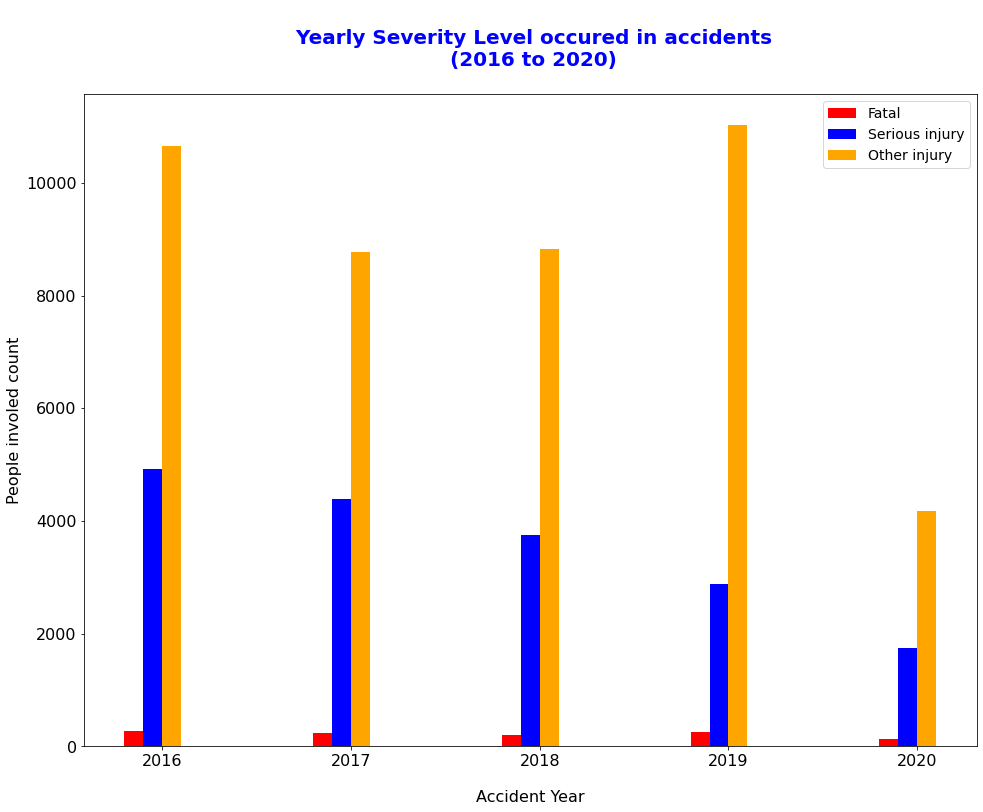

In [127]:
bar_width = 0.1 
xlabels = ['2016', '2017', '2018', '2019', '2020']

# Define bar group location on x_axis
bar1 = np.arange(len(xlabels))
bar2 = [i+bar_width for i in bar1]
bar3 = [i+bar_width for i in bar2]

plt.rcParams["figure.figsize"] = (16,12)
plt.plot(kind="bar")
plt.bar(bar1, fatal_counts,bar_width, label='Fatal', color = 'red')
plt.bar(bar2, serious_inj_counts,bar_width, label='Serious injury',  color = 'blue')
plt.bar(bar3, other_inj_counts, bar_width, label='Other injury', color ='orange')

plt.title("\n Yearly Severity Level occured in accidents\n (2016 to 2020)\n", fontsize=20, color='b', fontweight='bold')
plt.xlabel("\nAccident Year", fontsize = 16)
plt.ylabel("People involed count",fontsize = 16)

# Define each label location where it starts from the first bar plus one and a half bar widths
plt.xticks(bar1 + bar_width + bar_width/2, xlabels, fontsize = 16)
plt.yticks(fontsize = 16)

# Show plot
plt.legend(fontsize = 14)

file_name = "Cause_YearlySeverity"  
filepath = f"{output_path}/{file_name}"  
save_show_plot(filepath)         

''The chart above: 
2016 had the highest fatal rate, 2019 was the second, 2017 was the third.
2016 had the most serious injury, then the ratio declined in a good ratio years after. 
2019 had the highest ‘other injury’ type.
2020 had 111 days in lock down for Victorians, and 2 months less of data collection.  The fatal rate is quite high in comparing to other years.  According to some 2020 news reports at the time, the lockdown had created some stress and mental issues to people.
''

# Road user gender analysis

### Extract road user's details

In [128]:
df = person_df.drop(person_df.columns[0], axis=1)
extract_person_df = df[['ACCIDENT_NO', 'PERSON_ID', 'SEX',
        'Inj Level Desc', 'SEATING_POSITION','HELMET_BELT_WORN', 'Road User Type Desc']]
extract_person_df.rename(columns = {'Inj Level Desc':"INJ_LEVEL_DESC", 'Road User Type Desc':"ROAD_USER_TYPE_DESC"}, inplace = True)
print(f"Person csv file rows: {len(extract_person_df)}")
row_counts = len(extract_person_df["ACCIDENT_NO"].unique())
row_counts

Person csv file rows: 148373


62266

## Road User Fatility analysis based on gender

In [129]:
# Find fatal injury level
fatal_counts = extract_person_df.loc[extract_person_df["INJ_LEVEL_DESC"].isin(['Fatality'])]
df = fatal_counts.groupby(["SEX"]).count()["ACCIDENT_NO"]
df = df.to_frame()
df.reset_index(inplace = True)
df.to_csv("project_data/Cause_FatalInGender.csv", index=False)

*** Figure created in: c:/project_output/Cause_FatalRoadUserGender.png ************************


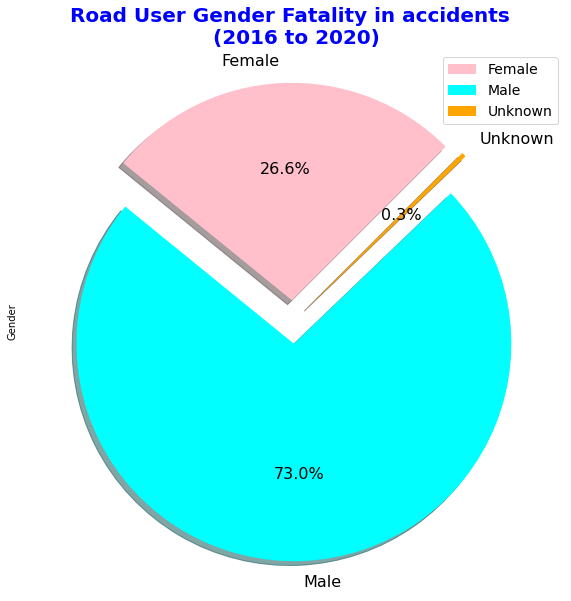

In [130]:
# Plot a pie chart of types involved
df.rename(columns = {'ACCIDENT_NO':"Gender"}, inplace = True)
user_counts = df["Gender"]

labels = ['Female', 'Male', 'Unknown']
colors = [ 'pink', 'cyan', 'orange']
explodes = (0.1, 0.1, 0.1)

acct_chart = pd.DataFrame(data = user_counts)    

acct_chart.plot(kind = "pie", figsize = [15,10],
       subplots=True, shadow = True, 
       labels = labels, fontsize = 16, explode = explodes,
       startangle = 45, colors = colors,autopct="%1.1f%%" );
 
# Set title
plt.title("Road User Gender Fatality in accidents \n (2016 to 2020)", fontsize=20, color='b', fontweight='bold')

# Show plot
plt.legend(labels, loc="upper right", fontsize=14)
file_name = "Cause_FatalRoadUserGender"  
filepath = f"{output_path}/{file_name}"  
save_show_plot(filepath)              

'''The chart above:
As the pie chart shows, road user gender Male has the highest fatal in comparing to female, 1.7 times more than the total fatal rate of female and unknown.  
Data show 861, 314 and 4 people respective.
'''

##  Road User Type analysis based on gender

In [131]:
# Find road users based on gender
df = extract_person_df.groupby(["SEX", "ROAD_USER_TYPE_DESC"]).count()["ACCIDENT_NO"]
df = df.to_frame()
df.reset_index(inplace = True)

# drop rows that have no sex code defined
df = df.drop([0,1,2,3])
df.to_csv("project_data/Cause_RdUsrGender.csv", index=False)

In [108]:
# Build data lists
bicyclists = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Bicyclists'])]
bicyclists = bicyclists["ACCIDENT_NO"]
drivers = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Drivers'])]  
drivers = drivers["ACCIDENT_NO"]
motorcyclists = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Motorcyclists'])]  
motorcyclists = motorcyclists["ACCIDENT_NO"]
passengers = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Passengers'])]  
passengers = passengers["ACCIDENT_NO"]
pedestrians = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Pedestrians'])]  
pedestrians = pedestrians["ACCIDENT_NO"]
unknowns = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Unknown'])]  
unknowns = unknowns["ACCIDENT_NO"]
pill_assengers = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Pillion Passengers'])]  
pill_assengers = pill_assengers["ACCIDENT_NO"]

*** Figure created in: c:/project_output/Cause_RoadUserGender.png ************************


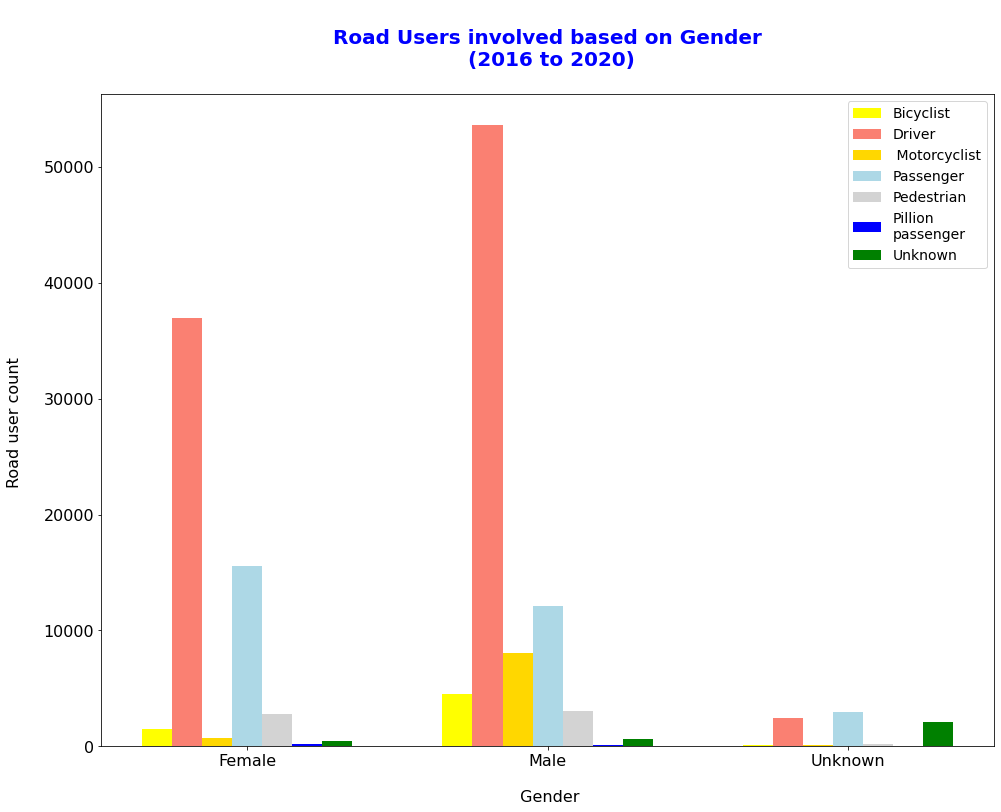

In [109]:
bar_width = 0.1 
xlabels = ['Female', 'Male', 'Unknown']

# Define bar group location on x_axis
bar1 = np.arange(len(xlabels))
bar2 = [i+bar_width for i in bar1]
bar3 = [i+bar_width for i in bar2]
bar4 = [i+bar_width for i in bar3]
bar5 = [i+bar_width for i in bar4]
bar6 = [i+bar_width for i in bar5]
bar7 = [i+bar_width for i in bar6]

plt.rcParams["figure.figsize"] = (16,12)
plt.plot(kind="bar")

plt.bar(bar1, bicyclists,bar_width, label='Bicyclist', color = 'yellow')
plt.bar(bar2, drivers,bar_width, label='Driver',  color = 'salmon')
plt.bar(bar3, motorcyclists, bar_width, label=' Motorcyclist', color ='gold')
plt.bar(bar4, passengers,bar_width, label='Passenger', color ='lightblue')
plt.bar(bar5, pedestrians,bar_width, label='Pedestrian',  color = 'lightgrey')
plt.bar(bar6, pill_assengers, bar_width, label='Pillion\npassenger', color ='blue')
plt.bar(bar7, unknowns,bar_width, label='Unknown', color ='green')

plt.title("\nRoad Users involved based on Gender\n (2016 to 2020)\n", fontsize=20, color='b', fontweight='bold')
plt.xlabel("\n Gender", fontsize = 16)
plt.ylabel("Road user count \n",fontsize = 16)

# Define each label location where it starts from the first bar plus three bar widths
plt.xticks(bar1 + 3* bar_width, xlabels, fontsize = 16)
plt.yticks(fontsize = 16)

# Show plot
plt.legend(fontsize=14)
file_name = "Cause_RoadUserGender"  
filepath = f"{output_path}/{file_name}"  
save_show_plot(filepath)              

'''In the chart above: 
Male drivers have more accidents than female, the ratio is male 45% more than female.
Female road users are more in passenger’s roles.
More male motorcyclist have accident than females, the ratio is male 10 times more than females.

'''

## Road User Fatality has helmet or seatbelt on

In [132]:
# Find fatal road users who worn helmet or seatbelt
fatal_counts = extract_person_df.loc[extract_person_df["INJ_LEVEL_DESC"].isin(['Fatality'] )
                                    & extract_person_df["HELMET_BELT_WORN"].isin(["1", "6"])]
# Find count of the road user types
df = fatal_counts.groupby(["ROAD_USER_TYPE_DESC"]).count()["ACCIDENT_NO"]
df = df.to_frame()
df.reset_index(inplace = True)
df.to_csv("project_data/Cause_FaltalRdUsrWHelmet.csv", index=False)

*** Figure created in: c:/project_output/Cause_FaltalRdUsrWHelmet.png ************************


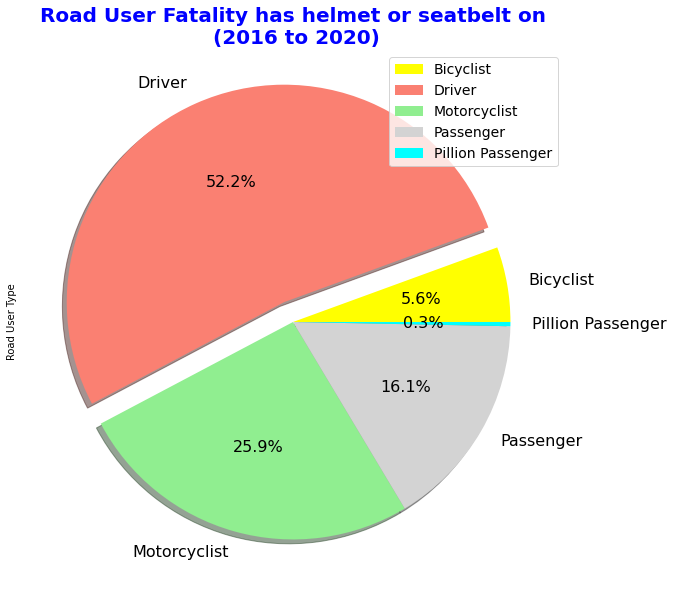

In [133]:
# Plot a pie chart of types involved
df.rename(columns = {'ACCIDENT_NO':"Road User Type"}, inplace = True)
user_counts = df["Road User Type"]
labels = ['Bicyclist', 'Driver', 'Motorcyclist', 'Passenger', 'Pillion Passenger']
colors = [ "yellow", "salmon", 'lightgreen', 'lightgrey','cyan']
explodes = (0, 0.1, 0, 0, 0)

acct_chart = pd.DataFrame(data = user_counts)     

acct_chart.plot(kind = "pie", figsize = [15,10],
       subplots=True, shadow = True, 
       labels = labels, fontsize = 16, explode = explodes,
       startangle = 0, colors = colors,autopct="%1.1f%%" );
 
# Set title
plt.title("Road User Fatality has helmet or seatbelt on\n (2016 to 2020)", fontsize=20, color='b', fontweight='bold')

# Show plot
plt.legend(labels, loc="best", fontsize=14)
file_name = "Cause_FaltalRdUsrWHelmet"  
filepath = f"{output_path}/{file_name}"  
save_show_plot(filepath)              

'''The chart above: 
With seatbelt or helmet on, road user drivers have highest fatal rate, second is motorcyclists, then passengers.  
Motorcyclist’s rate is almost of half the drivers, but in comparing to the total road user type population, motorcyclist has higher fatal rate than driver.
'''

## Road User Fatality has NO helmet or seatbelt on

In [134]:
# Find fatal road users NOT wearing helmet or seatbelt
fatal_counts = extract_person_df.loc[extract_person_df["INJ_LEVEL_DESC"].isin(['Fatality'] )
                                    & (~extract_person_df["HELMET_BELT_WORN"].isin(["1", "6"]))]
# Find count of the road user types
df = fatal_counts.groupby(["ROAD_USER_TYPE_DESC"]).count()["ACCIDENT_NO"]
df = df.to_frame()
df.reset_index(inplace = True)
df.to_csv("project_data/Cause_FatalRdUsrNoHelmet.csv", index=False)

*** Figure created in: c:/project_output/Cause_FatalRdUsrNoHelmet.png ************************


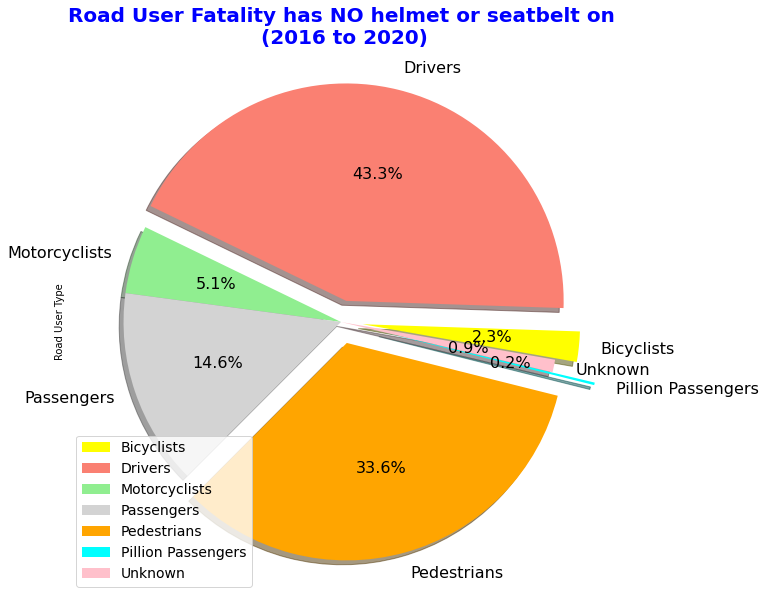

In [135]:
# Plot a pie chart of types involved
df.rename(columns = {'ACCIDENT_NO':"Road User Type"}, inplace = True)
user_counts = df["Road User Type"]

labels = ['Bicyclists', 'Drivers', 'Motorcyclists', 'Passengers', 'Pedestrians', 'Pillion Passengers', 'Unknown']
colors = [ "yellow", "salmon", 'lightgreen', 'lightgrey','orange', 'cyan', 'pink']
explodes = (0.1, 0.1, 0, 0, 0.1, 0.2, 0)

acct_chart = pd.DataFrame(data = user_counts)     

acct_chart.plot(kind = "pie", figsize = [15,10],
       subplots=True, shadow = True, 
       labels = labels, fontsize = 16, explode = explodes,
       startangle = -10, colors = colors,autopct="%1.1f%%" );
 
# Set title
plt.title("Road User Fatality has NO helmet or seatbelt on\n (2016 to 2020)", fontsize=20, color='b', fontweight='bold')

# Show plot
plt.legend(labels, loc="lower left", fontsize=14)
file_name = "Cause_FatalRdUsrNoHelmet"  
filepath = f"{output_path}/{file_name}"  
save_show_plot(filepath)              

'''
The chart above:
Without wearing seatbelt or helmet, road user drivers have highest fatal rate, second is pedestrians, then passengers.  
Pedestrians are quite vulnerable, more than 3 quarter of the driver’s rate.'''

## Road user injury level in accidents

### Find injury levels in the accident
#### - Pillion passenger and unknown user types are very low fatality, the fatality bars for these users are almost invisible in the bar chart.

#### Retrieve data and build data list

In [136]:
# Find injure level for Fatal, Serious Injury, Other injury and Not injured
df = extract_person_df.groupby(["ROAD_USER_TYPE_DESC", "INJ_LEVEL_DESC"]).count()["ACCIDENT_NO"]
df = df.to_frame()
df.reset_index(inplace = True)

# Build data lists
fatal_counts = df.loc[df["INJ_LEVEL_DESC"].isin(['Fatality'])]
fatal_counts = fatal_counts["ACCIDENT_NO"]
serious_inj_counts = df.loc[df["INJ_LEVEL_DESC"].isin(['Serious injury'])]  
serious_inj_counts = serious_inj_counts["ACCIDENT_NO"]
not_inj_counts = df.loc[df["INJ_LEVEL_DESC"].isin(['Not injured'])]  
not_inj_counts = not_inj_counts["ACCIDENT_NO"]
other_inj_counts = df.loc[df["INJ_LEVEL_DESC"].isin(['Other injury'])]  
other_inj_counts = other_inj_counts["ACCIDENT_NO"]#
df.to_csv("project_data/Cause_RdUsrInjury.csv", index=False)

#### Setup bar, labels, etc for chart plotting

*** Figure created in: c:/project_output/Cause_RdUsrInjury.png ************************


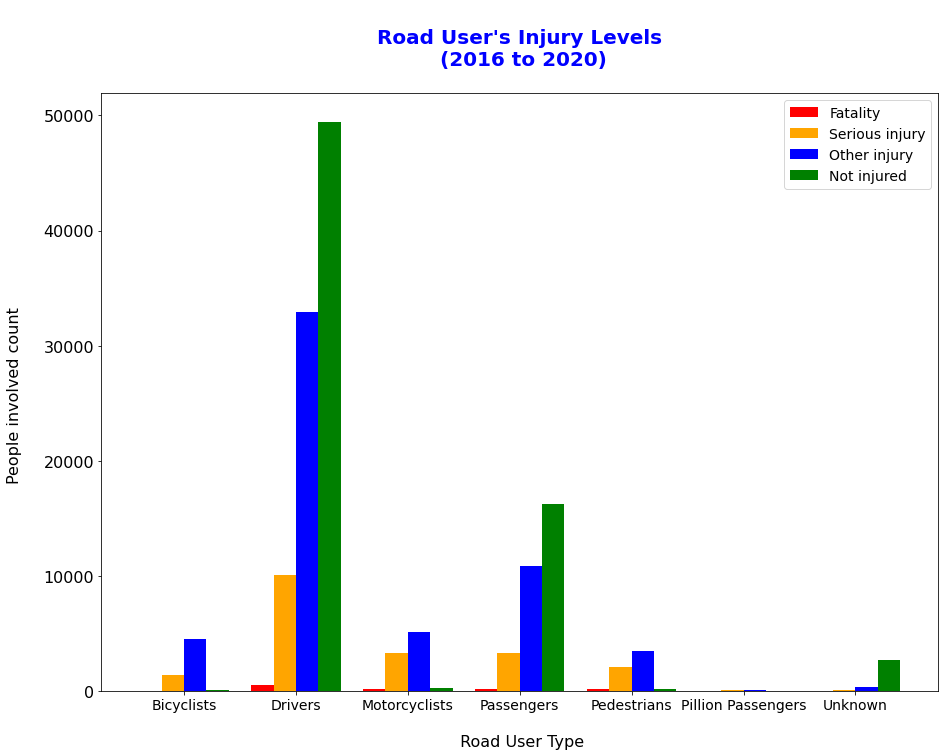

In [137]:
bar_width = 0.2 
xlabels = ['Bicyclists', 'Drivers', 'Motorcyclists', 'Passengers', 'Pedestrians', 'Pillion Passengers', 'Unknown']

# Define bar group distance on x_axis
bar1 = np.arange(len(xlabels))
bar2 = [i+bar_width for i in bar1]
bar3 = [i+bar_width for i in bar2]
bar4 = [i+bar_width for i in bar3]

plt.rcParams["figure.figsize"] = (15,11)
plt.plot(kind="bar")
plt.bar(bar1, fatal_counts,bar_width, label='Fatality', color = 'red')
plt.bar(bar2, serious_inj_counts,bar_width, label='Serious injury',  color = 'orange')
plt.bar(bar3, other_inj_counts, bar_width, label='Other injury', color ='blue')
plt.bar(bar4, not_inj_counts,bar_width, label='Not injured', color ='green')

plt.title("\nRoad User's Injury Levels\n (2016 to 2020)\n", fontsize=20, color='b', fontweight='bold')
plt.xlabel("\n Road User Type", fontsize = 16)
plt.ylabel("People involved count \n",fontsize = 16)

# Define each label location where it starts from the first bar plus one and a half of the bar width
plt.xticks(bar1 + bar_width + bar_width/2, xlabels, fontsize = 14)
plt.yticks(fontsize = 16)

# Show plot
plt.legend(fontsize = 14)
file_name = "Cause_RdUsrInjury"  
filepath = f"{output_path}/{file_name}"  
save_show_plot(filepath)              

'''
The chart above: "Unknown injury" had been dropped in this analysis, they are the outliers.
Driver type has highest fatal rate, second is motorcyclist, then passengers.  
Drivers have the highest total injury rate, second is the passengers, then motorcyclist, fourth is pedestrians who are quite vulnerable.
'''